In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Loading the Dataset

In this section, we load the dataset from a local file. The dataset is expected to contain the following columns:

- **Unnamed: 0**: An index or identifier for each record.
- **count**: The number of words in the tweet.
- **hate_speech**: A score indicating the presence of hate speech.
- **offensive_language**: A score indicating offensive language.
- **neither**: A score indicating neutrality.
- **class**: The label (0 for hate speech, 1 for offensive language, 2 for neutral).
- **tweet**: The text of the tweet.


In [3]:
# Load the dataset
file_path = "./dataset/data.csv" 
data = pd.read_csv(file_path)

data.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
9218,9474,3,0,3,0,1,Fucc yo face card nicca #UMightNotGetIn #Beera...
13914,14254,4,0,4,0,1,Probably saved @KingBorgman's ass today. About...
5090,5241,3,2,1,0,0,@Vexda go jerk off to lollis faggot.
22593,23069,3,0,0,3,2,What a trash franchise. RT @ArashMarkazi: Ferg...
20530,20976,3,0,2,1,1,Riding wit my old dude .. Dis nicca bangin #Fr...


## Understanding the Data

Here, we analyze the structure and contents of the dataset. This helps identify missing values, data types, and the balance of the target classes.


In [13]:
data.shape

(24783, 7)

In [14]:
# Check for null values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None


In [15]:
# Summary statistics
print(data.describe())

         Unnamed: 0         count   hate_speech  offensive_language  \
count  24783.000000  24783.000000  24783.000000        24783.000000   
mean   12681.192027      3.243473      0.280515            2.413711   
std     7299.553863      0.883060      0.631851            1.399459   
min        0.000000      3.000000      0.000000            0.000000   
25%     6372.500000      3.000000      0.000000            2.000000   
50%    12703.000000      3.000000      0.000000            3.000000   
75%    18995.500000      3.000000      0.000000            3.000000   
max    25296.000000      9.000000      7.000000            9.000000   

            neither         class  
count  24783.000000  24783.000000  
mean       0.549247      1.110277  
std        1.113299      0.462089  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      1.000000  
75%        0.000000      1.000000  
max        9.000000      2.000000  


In [4]:
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

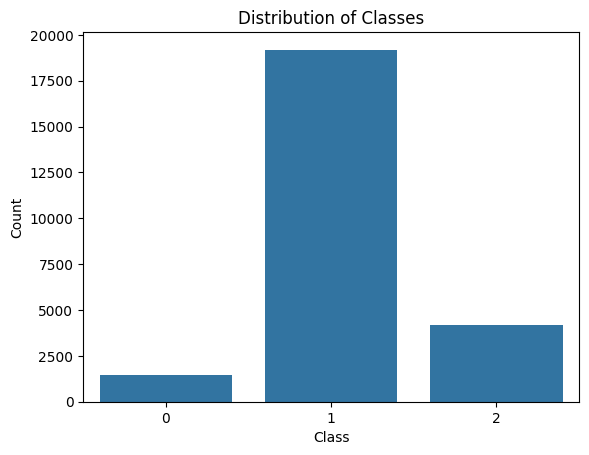

In [16]:
# Distribution of the target variable
sns.countplot(x='class', data=data)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Cleaning duplicates and null values
This code performs initial data cleaning by removing duplicate and NaN rows.

In [6]:
data.dropna(how='all', inplace=True)
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
data.shape

(24783, 7)

## Exploratory Data Analysis (EDA)

In this section, we analyze the data through visualizations. We explore:

- **Length of tweets**.
- **Relationships between the scores** (`hate_speech`, `offensive_language`, `neither`) **and the class**.


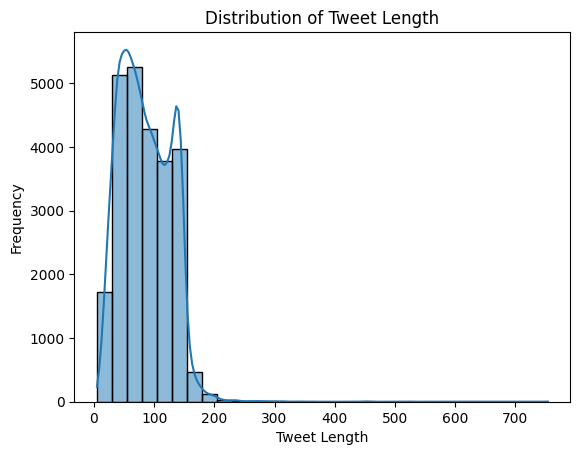

In [ ]:
# Length of tweets
data['tweet_length'] = data['tweet'].apply(len)
sns.histplot(data['tweet_length'], kde=True, bins=30)
plt.title("Distribution of Tweet Length")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()



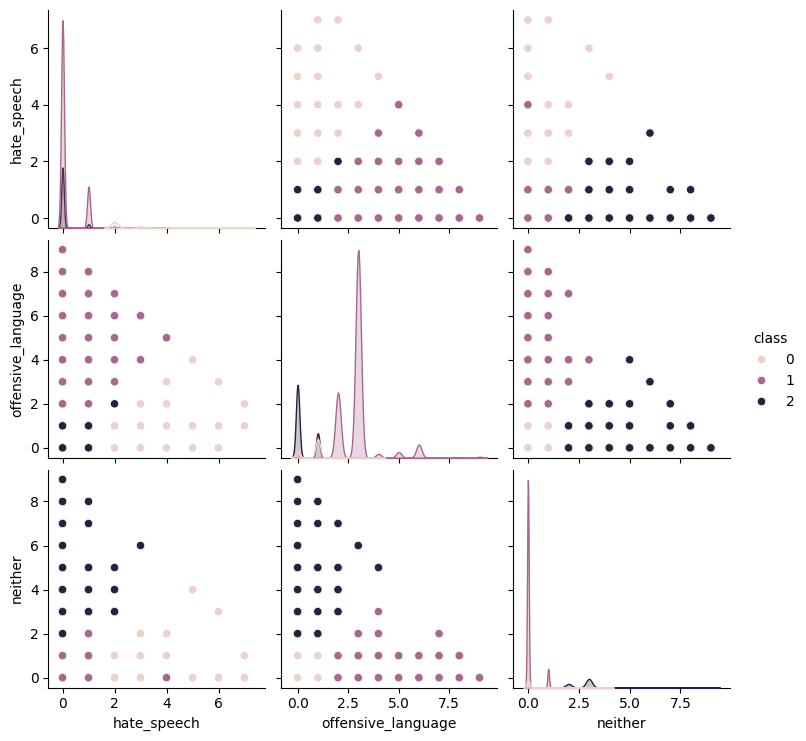

In [ ]:
# Scatter plot of score
sns.pairplot(data, vars=['hate_speech', 'offensive_language', 'neither'], hue='class')
plt.show()

## Data cleaning
Function to clean text data, removing URLs, hashtags, numbers, mentions, and other unnecessary components from comments.

In [5]:
# Text processing functions
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove username
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Keep alphabets
    text = text.lower()
    return text

In [6]:
# Apply the clean_comment function to the tweet column
data['processed_tweet'] = data['tweet'].apply(clean_text)

# Check cleaned data
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,processed_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt as a woman you shouldn t complain abo...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt boy dats cold tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt dawg rt you ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt the shit you hear about me ...


## Balancing Data

### Undersampling the Majority Class
This code block addresses the class imbalance in the dataset by downsampling the majority classes (offensive and neutral) to match the size of the minority class (hate)

In [8]:
from sklearn.utils import resample


# Separate the classes
class_0 = data[data['class'] == 0]
class_1 = data[data['class'] == 1]
class_2 = data[data['class'] == 2]

# Undersample class 1 (majority) to match class 0 (minority)
class_1_undersampled = resample(class_1, 
                                 replace=False,    # Don't sample with replacement
                                 n_samples=len(class_0),  # Match minority class size
                                 random_state=42)  # For reproducibility

# Combine the undersampled class 1 with class 0 and class 2
undersampled_data = pd.concat([class_0, class_1_undersampled, class_2])

# Shuffle the data to mix the classes
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(undersampled_data['class'].value_counts())

class
2    4163
1    1430
0    1430
Name: count, dtype: int64


### Oversampling the Minority Class
Oversampling involves randomly duplicating examples from the minority class (class 0 and class 2 in your case) to match the majority class size (class 1)

In [9]:
# Oversample minority classes (class 0 and class 2)
class_0_oversampled = resample(class_0, 
                               replace=True,     # Sample with replacement
                               n_samples=len(class_1),  # Match majority class size
                               random_state=42)

class_2_oversampled = resample(class_2, 
                               replace=True,     # Sample with replacement
                               n_samples=len(class_1),  # Match majority class size
                               random_state=42)

# Combine the oversampled class 0 and class 2 with class 1
oversampled_data = pd.concat([class_0_oversampled, class_1, class_2_oversampled])

# Shuffle the data to mix the classes
oversampled_data = oversampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(oversampled_data['class'].value_counts())


class
1    19190
2    19190
0    19190
Name: count, dtype: int64


## Saving the Processed Data
The processed data is saved for later use. This allows us to reuse the cleaned dataset without repeating the preprocessing steps.

In [20]:
# Save the processed data
# processed_data = pd.DataFrame({'processed_tweet': data['processed_tweet'], 'class': data['class']})
# processed_data.to_csv('./processed_data/processed_comments.csv', index=False)
# print("Processed data saved to 'processed_toxic_comments.csv'")

processed_data_undersampled = pd.DataFrame({
    'processed_tweet': undersampled_data['tweet'],
    'class': undersampled_data['class']
})
processed_data_undersampled.to_csv('./processed_data/processed_comments_undersampled.csv', index=False)
print("Processed data saved to 'processed_comments_undersampled.csv'")


# Create the processed DataFrame
processed_data_oversampled = pd.DataFrame({
    'processed_tweet': oversampled_data['tweet'], 
    'class': oversampled_data['class']
})
processed_data_oversampled.to_csv('./processed_data/processed_comments_oversampled.csv', index=False)
print("Processed data saved to 'processed_comments_oversampled.csv'")


Processed data saved to 'processed_toxic_comments.csv'
